# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [96]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
from scipy import stats

In [97]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [98]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Omar Baccus\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


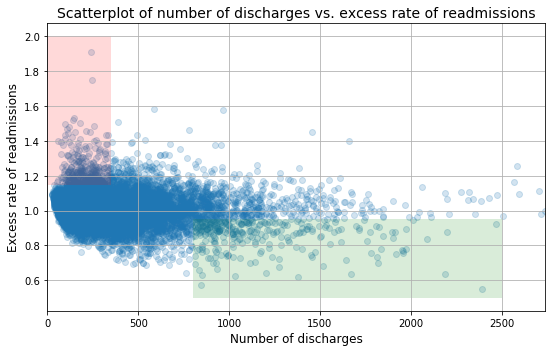

In [99]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [100]:
#Start by combining x and y into a single datafram

df_disch=pd.DataFrame(x)
df_read=pd.DataFrame(y)

#Concatenate the dataframes
df=pd.concat([df_disch, df_read], axis=1)

#Assign column names
df.columns= ['discharges', 'excess_read']

#print the dataframe head
df.head()

,discharges,excess_read
0,25,1.0914
1,27,1.0961
2,28,1.0934
3,29,1.0908
4,30,1.1123


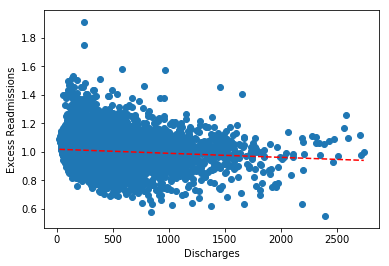

In [101]:
#Drawing trend line on scatter plot

_=plt.scatter(x=df.discharges, y=df.excess_read)
z= np.polyfit(df.discharges, df.excess_read, 1)
p= np.poly1d(z)
_=plt.plot(df.discharges, p(df.discharges), "r--")
_=plt.xlabel('Discharges')
_=plt.ylabel('Excess Readmissions')
plt.show()

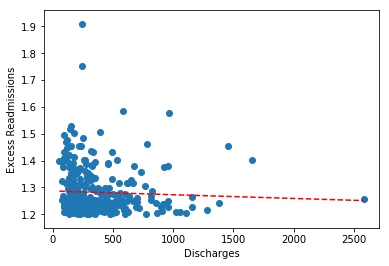

In [102]:
#Now we want to isolate the part of the scatter plot where Discharges are low and Excess Readmissions are high and confirm point
#2 of A. 
df1 = df[df.discharges <= 500]
df1 = df[df['excess_read'] >= 1.2]
plt.scatter(df1.discharges, df1.excess_read, data=df1)
z= np.polyfit(df1.discharges, df1.excess_read, 1)
p= np.poly1d(z)
_=plt.plot(df1.discharges, p(df1.discharges), "r--")
_=plt.xlabel('Discharges')
_=plt.ylabel('Excess Readmissions')
plt.show()

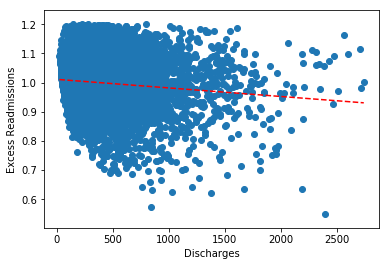

In [103]:
#Now we would like to isolate the part of the graph where the discharges are high, and the excess readmissions are low

df2 = df[df.discharges <= 2000]
df2 = df[df['excess_read'] <= 1.2]
plt.scatter(df2.discharges, df2.excess_read, data=df2)
z= np.polyfit(df2.discharges, df2.excess_read, 1)
p= np.poly1d(z)
_=plt.plot(df2.discharges, p(df2.discharges), "r--")
_=plt.xlabel('Discharges')
_=plt.ylabel('Excess Readmissions')
plt.show()

In [104]:
#Part B - Statistics
#Slice df for discharges less than 100

df_low= df[df.discharges < 100]

#Calculating the mean of dataframe
df_low_mean= np.mean(df_low.excess_read)

print("Mean excess readmission rate is= ", df_low_mean)

#Calculating percentage of excess readmission rate
df_g_1= (len(df_low[df_low.excess_read > 1]) / len(df_low))*100

print("Percentage of excess readmission rates greater than 1 is= ", df_g_1,"% ")


Mean excess readmission rate is=  1.0226183501683506
Percentage of excess readmission rates greater than 1 is=  63.215488215488215 % 


In [105]:
#Part B - Statistics
#Slice df for discharges >1000

df_high= df[df.discharges > 1000]

#Calculating the mean of dataframe
df_high_mean= np.mean(df_high.excess_read)

print("Mean excess readmission rate is= ", df_high_mean)

#Calculating percentage of excess readmission rate
df_g_1_1= (len(df_high[df_high.excess_read > 1]) / len(df_high))*100

print("Percentage of excess readmission rates greater than 1 is= ", df_g_1_1,"% ")


Mean excess readmission rate is=  0.9790730434782613
Percentage of excess readmission rates greater than 1 is=  44.565217391304344 % 


C:\Users\Omar Baccus\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Omar Baccus\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


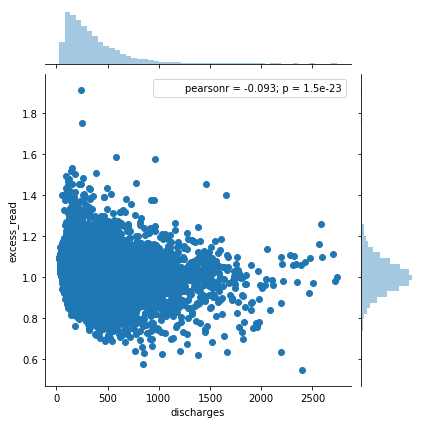

In [106]:
#Part C - testing the correlation between the number of discharges and the readmission rate. We can plot this with a pearson
#correlation coefficient

sns.jointplot(x=df.discharges, y=df.excess_read, data=df, kind='scatter' )

In [107]:
#Calculating the readmission rate for hospitals with less than 300 discharges

df_re= df[df.discharges < 300]

#Calculating the mean of dataframe
df_re_mean= np.mean(df_re.excess_read)

print("Mean excess readmission rate is= ", df_re_mean)

#Calculating percentage of excess readmission rate
df_g_1_2= (len(df_re[df_re.excess_read > 1]) / len(df_re))*100

print("Percentage of excess readmission rates greater than 1 is= ", df_g_1_2,"% ")

Mean excess readmission rate is=  1.0142382121807445
Percentage of excess readmission rates greater than 1 is=  53.74918140144074 % 


In [108]:
# My Recommendation

In [109]:
#We have access to state information from the original dataset. Let us suppose and try to test that that readmission rates 
#vary significantly by state

In [149]:
#New dataframe
state = list(clean_hospital_read_df['State'][81:-3])
err = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

x = pd.DataFrame(state)
y = pd.DataFrame(err)

#Concatenating the datasets 
df = pd.concat([x,y], axis=1)
df.columns = ['state', 'excess_read']

#Grouping the data by state and calculating the mean of readmision rates by state
df = df.groupby('state').mean().reset_index()

#print dataframe head
df.head()

,state,excess_read
0,AK,0.979645
1,AL,1.019177
2,AR,1.030027
3,AZ,0.998832
4,CA,0.996700


In [150]:
#We should plot the data, to have a better understanding of the mean readmission rates per state


df.state.describe()
#Note that we have 51 states in this dataframe, and it would be impossible to plot all on the same graph neatly


count     51
unique    51
top       MA
freq       1
Name: state, dtype: object

In [151]:
#Sort the data so that you capture the top 5 and bottom 5 states based on their mean excess readmission rates

top_5 = df.sort_values(by='excess_read').head(5)
bot_5 = df.sort_values(by='excess_read').tail(5)

Text(0,0.5,'Readmission Rates')

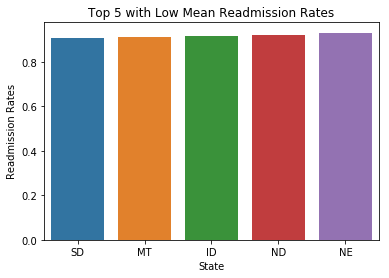

In [157]:
#Now let's plot this information

_=sns.barplot('state', 'excess_read' , data=top_5)
plt.title ('Top 5 with Low Mean Readmission Rates')
plt.xlabel ('State')
plt.ylabel ('Readmission Rates')



Text(0,0.5,'Readmission Rates')

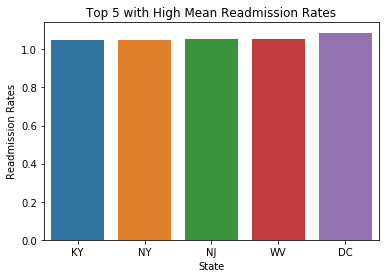

In [158]:
_1=sns.barplot('state', 'excess_read' , data=bot_5)
plt.title('Top 5 with High Mean Readmission Rates')
plt.xlabel ('State')
plt.ylabel ('Readmission Rates')


In [159]:
#Now I will isolate the dataset such that I study one of the top 5 states and one of the bottom 5 states

#Reload the dataset without group by to add data variation

state = list(clean_hospital_read_df['State'][81:-3])
err = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

x = pd.DataFrame(state)
y = pd.DataFrame(err)

#Concatenating the datasets 
df = pd.concat([x,y], axis=1)
df.columns = ['state', 'excess_read']


#Choosing ID (Idaho) from the top with low
ida = df[df.state == 'ID']
ida = ida['excess_read']


#Choosing NJ (New Jersey) from the top with high
nj= df[df.state == 'NJ']
nj= nj['excess_read']

#Using a t test, I will test the null hypothesis that their mean readmission rates are equal

print(stats.ttest_ind(ida, nj))

print("The p-value of our test statistics is extremely small, and therefore we can reject the null")




Ttest_indResult(statistic=-8.429798098497928, pvalue=1.1974092504895383e-15)
The p-value of our test statistics is extremely small, and therefore we can reject the null


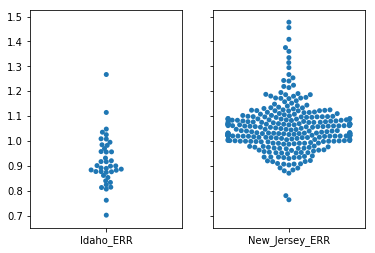

In [160]:
#Understanding the distribution (swarm) of hospitals in Idaho and New Jersey in terms of excess readmission rates
#Notice NJ has a larger proportion of hospitals with readmission rates between 0.9 and 1.2. 
ida = df[df.state == 'ID']
ida = ida[['excess_read']]
ida.columns = ['Idaho_ERR']

nj = df[df.state == 'NJ']
nj = nj[['excess_read']]
nj.columns = ['New_Jersey_ERR']

fig, axs = plt.subplots(ncols=2, sharey=True)
sns.swarmplot(data=ida, ax=axs[0])
sns.swarmplot(data=nj, ax=axs[1])
